### This notebooks processes the source file 

In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
from pandas import ExcelWriter
from pandas import ExcelFile
import seaborn as sns
import datetime
sns.set()
import matplotlib.pyplot as plt
%matplotlib inline  

In [2]:
#I want to generate single csv files for each region

In [3]:
# Reading the excel file
# TO DO: download form googel sheets
df_iter = pd.read_excel('../data/covid-19_IT.xlsx', sheet_name=None)

In [4]:

#columns_summary = df_iter[list(df_iter.keys())[0]].columns

In [5]:
# Retrieve each dataframe, save the csv and collect the 
# total row to create a summary file
total_rows=[]
for key in df_iter.keys():
    df_iter[key].to_csv('../data/csv/'+key+'.csv')
    # Here populating the summary DF
    row = df_iter[key][df_iter[key]['Regione']=='Somma Totale']
    total_rows.append(row)

In [6]:
summary = pd.concat(total_rows)

In [7]:
summary = summary.set_index(pd.Index(df_iter.keys()))

In [8]:
summary = summary.drop(['Regione'], axis=1)

In [9]:
with ExcelWriter('../data/generated_summary.xlsx') as writer:
    summary.to_excel(writer)

In [10]:
summary

,Ricoverati con sintomi,Terapia Intensiva,Isolamento Domiciliare,Totale,Dimessi Guariti,Deceduti,Totale Positivi,Tamponi
23.02,54.0,26.0,22.0,129.0,1.0,2.0,NaN,NaN
24.02,101.0,27.0,94.0,229.0,1.0,6.0,NaN,NaN
25.02,114.0,35.0,162.0,322.0,1.0,10.0,NaN,NaN
26.02,128.0,36.0,221.0,400.0,3.0,12.0,NaN,NaN
27.02,248.0,56.0,284.0,588.0,45.0,17.0,650.0,12014.0
28.02,345.0,64.0,412.0,821.0,46.0,21.0,888.0,15695.0
29.02,401.0,105.0,543.0,1049.0,50.0,29.0,1128.0,18661.0
01.03,639.0,140.0,798.0,1577.0,83.0,34.0,1694.0,21127.0
02.03,742.0,166.0,927.0,1835.0,149.0,52.0,2036.0,23345.0


In [11]:
summary_ext = summary.copy()

In [12]:
# Since there have been a change in the reporting I'm merging 
summary_ext['True Totale'] = summary_ext['Ricoverati con sintomi'] + \
summary_ext['Terapia Intensiva'] + summary_ext['Isolamento Domiciliare']+\
summary_ext['Dimessi Guariti']+ summary_ext['Deceduti']


In [13]:
summary_ext

,Ricoverati con sintomi,Terapia Intensiva,Isolamento Domiciliare,Totale,Dimessi Guariti,Deceduti,Totale Positivi,Tamponi,True Totale
23.02,54.0,26.0,22.0,129.0,1.0,2.0,NaN,NaN,105.0
24.02,101.0,27.0,94.0,229.0,1.0,6.0,NaN,NaN,229.0
25.02,114.0,35.0,162.0,322.0,1.0,10.0,NaN,NaN,322.0
26.02,128.0,36.0,221.0,400.0,3.0,12.0,NaN,NaN,400.0
27.02,248.0,56.0,284.0,588.0,45.0,17.0,650.0,12014.0,650.0
28.02,345.0,64.0,412.0,821.0,46.0,21.0,888.0,15695.0,888.0
29.02,401.0,105.0,543.0,1049.0,50.0,29.0,1128.0,18661.0,1128.0
01.03,639.0,140.0,798.0,1577.0,83.0,34.0,1694.0,21127.0,1694.0
02.03,742.0,166.0,927.0,1835.0,149.0,52.0,2036.0,23345.0,2036.0


###### The datapoint about the total on February 23 is bogus but I reconstructed form the  information available here http://www.salute.gov.it/portale/news/p3_2_1_1_1.jsp?lingua=italiano&menu=notizie&p=dalministero&id=4087 where numbers don't add up 

In [14]:
# Replacing the totale on 23.02 with the official 129
summary_ext.loc['23.02']['True Totale'] = summary_ext.loc['23.02']['Totale']

In [15]:
pct_df = summary_ext.pct_change()

In [16]:
rounded_pct = (pct_df *100).round(2)

In [17]:
step = rounded_pct.drop(['Totale', 'Totale Positivi'], axis = 1)
final_pct = step.rename(columns={"True Totale": "Totale Positivi"})


#### Dataframe of percentage growth

In [18]:
final_pct

,Ricoverati con sintomi,Terapia Intensiva,Isolamento Domiciliare,Dimessi Guariti,Deceduti,Tamponi,Totale Positivi
23.02,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24.02,87.04,3.85,327.27,0.00,200.00,NaN,77.52
25.02,12.87,29.63,72.34,0.00,66.67,NaN,40.61
26.02,12.28,2.86,36.42,200.00,20.00,NaN,24.22
27.02,93.75,55.56,28.51,1400.00,41.67,NaN,62.50
28.02,39.11,14.29,45.07,2.22,23.53,30.64,36.62
29.02,16.23,64.06,31.80,8.70,38.10,18.90,27.03
01.03,59.35,33.33,46.96,66.00,17.24,13.21,50.18
02.03,16.12,18.57,16.17,79.52,52.94,10.50,20.19


In [19]:
#Today's Datee
d = datetime. datetime. today()
today_string = d.strftime('%d-%m-%Y')
today_string

'02-03-2020'

In [20]:
patients_plot =  summary_ext.drop(['Totale', 'Totale Positivi', \
                             'Tamponi', 'True Totale'], axis=1)


In [21]:
patients_plot

,Ricoverati con sintomi,Terapia Intensiva,Isolamento Domiciliare,Dimessi Guariti,Deceduti
23.02,54.0,26.0,22.0,1.0,2.0
24.02,101.0,27.0,94.0,1.0,6.0
25.02,114.0,35.0,162.0,1.0,10.0
26.02,128.0,36.0,221.0,3.0,12.0
27.02,248.0,56.0,284.0,45.0,17.0
28.02,345.0,64.0,412.0,46.0,21.0
29.02,401.0,105.0,543.0,50.0,29.0
01.03,639.0,140.0,798.0,83.0,34.0
02.03,742.0,166.0,927.0,149.0,52.0


#### Plotting the patient conditions

In [22]:
#Changing the index into actual dates
#summary_plot.index = [datetime.datetime.strptime(d+'.2020', '%d.%m.%Y').date() for d in summary_plot.index]

In [23]:
patients_plot_eng = patients_plot.copy()

In [24]:
patients_plot_eng.columns = ['Hospitalized with Symptoms', \
                           'Hospitalized in ICU',\
                           'Home Quaratine',\
                           'Dimissed',\
                            "Deceased"]
                            

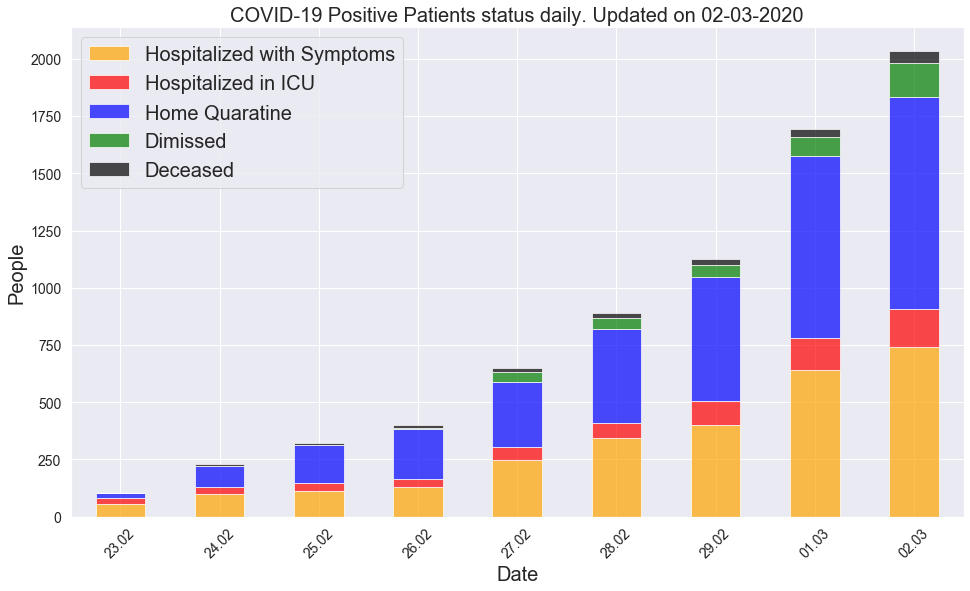

In [26]:
plt.rcParams.update({'font.size': 22})
plt.rcParams["figure.figsize"] = [16,9]
plt.rc('xtick',labelsize=14, )
plt.rc('ytick',labelsize=14)

ax = patients_plot_eng.plot.bar(stacked=True,color=['orange', 'red', 'blue', 'green', 'black'], alpha =0.7,\
                      title = "Summary of patient conditions")
ax.set_ylabel("People", fontname="Arial", fontsize=20)
ax.set_xlabel("Date", fontname="Arial", fontsize=20)
ax.legend(loc=2, prop={'size': 20})
ax.set_title("COVID-19 Positive Patients status daily. Updated on " + today_string,\
             fontname='Arial', fontsize=20)
plt.xticks(rotation=45)
plt.savefig('../plots/positive_patients_'+today_string+'_eng.png')


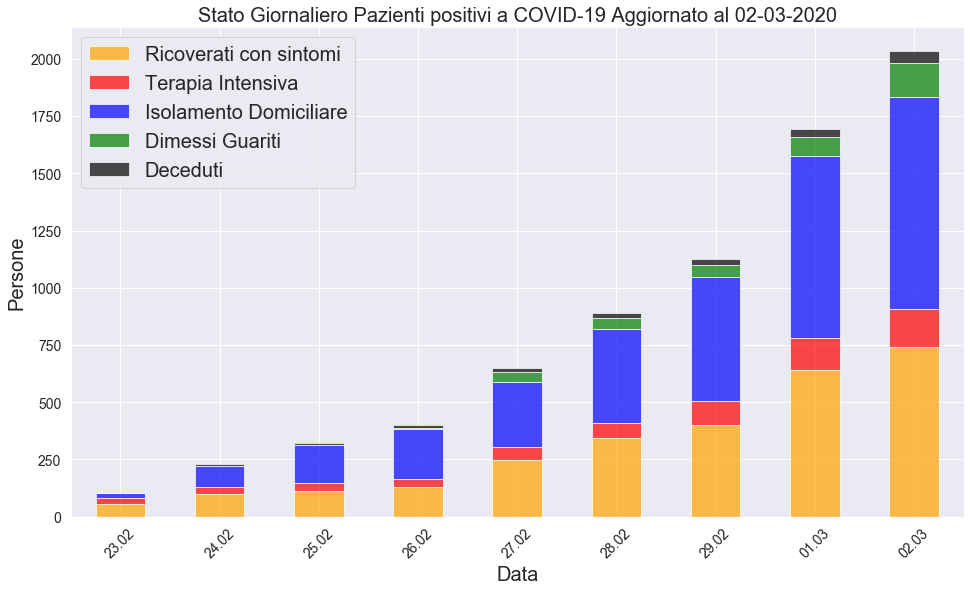

In [27]:
plt.rcParams.update({'font.size': 22})
plt.rcParams["figure.figsize"] = [16,9]
plt.rc('xtick',labelsize=14, )
plt.rc('ytick',labelsize=14)

ax = patients_plot.plot.bar(stacked=True,color=['orange', 'red', 'blue', 'green', 'black'], alpha =0.7,\
                      title = "Summary of patient conditions")
ax.set_ylabel("Persone", fontname="Arial", fontsize=20)
ax.set_xlabel("Data", fontname="Arial", fontsize=20)
ax.legend(loc=2, prop={'size': 20})
ax.set_title("Stato Giornaliero Pazienti positivi a COVID-19 Aggiornato al " + today_string,\
             fontname='Arial', fontsize=20)
plt.xticks(rotation=45)
plt.savefig('../plots/positive_patients_'+today_string+'_ita.png')


In [28]:
summary_ext

,Ricoverati con sintomi,Terapia Intensiva,Isolamento Domiciliare,Totale,Dimessi Guariti,Deceduti,Totale Positivi,Tamponi,True Totale
23.02,54.0,26.0,22.0,129.0,1.0,2.0,NaN,NaN,129.0
24.02,101.0,27.0,94.0,229.0,1.0,6.0,NaN,NaN,229.0
25.02,114.0,35.0,162.0,322.0,1.0,10.0,NaN,NaN,322.0
26.02,128.0,36.0,221.0,400.0,3.0,12.0,NaN,NaN,400.0
27.02,248.0,56.0,284.0,588.0,45.0,17.0,650.0,12014.0,650.0
28.02,345.0,64.0,412.0,821.0,46.0,21.0,888.0,15695.0,888.0
29.02,401.0,105.0,543.0,1049.0,50.0,29.0,1128.0,18661.0,1128.0
01.03,639.0,140.0,798.0,1577.0,83.0,34.0,1694.0,21127.0,1694.0
02.03,742.0,166.0,927.0,1835.0,149.0,52.0,2036.0,23345.0,2036.0


In [29]:
# Here I want to plot the percentage of ICU hospitalized over the total postive over time
ICU_perc = summary_ext.drop(['Totale', 'Totale Positivi', 'Tamponi'], axis=1)

In [30]:
ICU_perc['Alive_and_sick'] = ICU_perc['Terapia Intensiva']+\
ICU_perc['Ricoverati con sintomi']+ICU_perc['Isolamento Domiciliare']

In [31]:
ICU_perc['Percentage of Postivie and Alive patients in ICU'] = \
ICU_perc['Terapia Intensiva']/(ICU_perc['Alive_and_sick'])*100

In [32]:
ICU_perc['Data'] = ICU_perc.index
ICU_perc['Average'] =  ICU_perc['Percentage of Postivie and Alive patients in ICU'].mean()

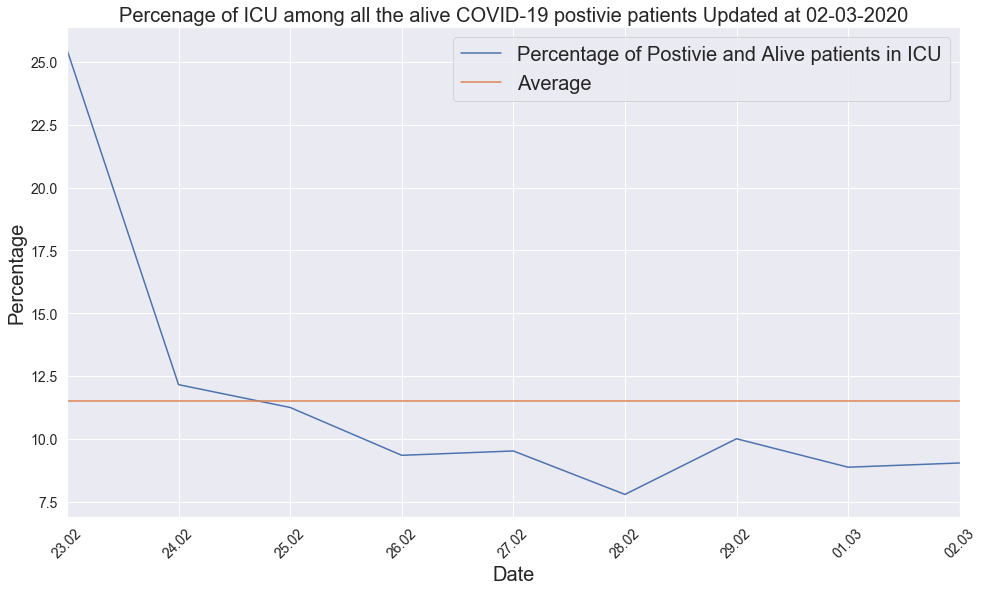

In [33]:
plt.rcParams.update({'font.size': 22})
plt.rcParams["figure.figsize"] = [16,9]
plt.rc('xtick',labelsize=14, )
plt.rc('ytick',labelsize=14)
#ax = sns.lineplot(x="Data", y="ICU_perc", data=ICU_perc)
ax = ICU_perc.plot(x='Data',y=['Percentage of Postivie and Alive patients in ICU', 'Average'])
ax.set_ylabel("Percentage", fontname="Arial", fontsize=20)
ax.set_xlabel("Date", fontname="Arial", fontsize=20)
ax.legend(loc=1, prop={'size': 20})
ax.set_title("Percenage of ICU among all the alive COVID-19 postivie patients Updated at " + today_string,\
             fontname='Arial', fontsize=20)
plt.xticks(rotation=45)
plt.savefig('../plots/ICU_percentage_'+today_string+'_ita.png')